# Import Statements

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [3]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk('yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk('no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the Data into Training & Testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [13]:
y_train.shape

(111, 2)

In [14]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 9s 3s/step - loss: 23.8292 - val_loss: 112.3337
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 16.0623 - val_loss: 9.3260
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 7.0842 - val_loss: 48.8318
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 4.9724 - val_loss: 60.3274
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 4.0801 - val_loss: 26.6780
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 1.9886 - val_loss: 10.6936
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 2.1674 - val_loss: 9.2808
Epoch 8/30
3/3 [==============================] - 8s 3s/step - loss: 0.7434 - val_loss: 14.4724
Epoch 9/30
3/3 [==============================] - 8s 3s/step - loss: 0.2562 - val_loss: 16.2069
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 0.3380 - val_loss: 14.6732
Epoch 11/30
3/3 [=====================

# Plotting Losses

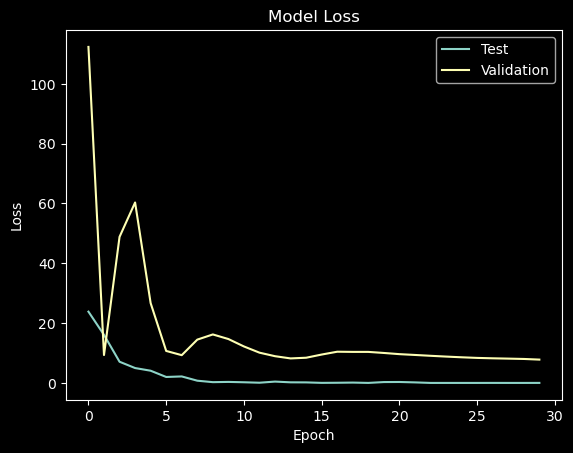

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [16]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


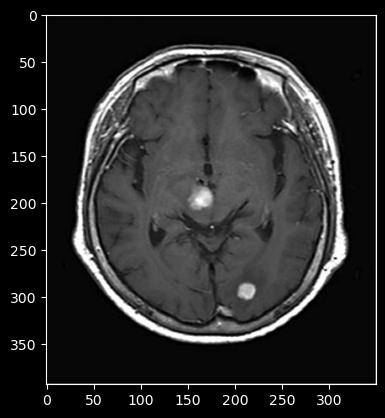

In [17]:
from matplotlib.pyplot import imshow
img = Image.open('no/N17.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


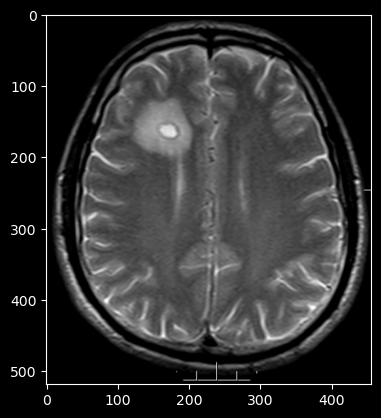

In [18]:
from matplotlib.pyplot import imshow
img = Image.open('yes/Y3.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [19]:
model.save('t1.keras')

In [20]:
!pip install gradio

In [21]:
!pip install tensorflow

In [22]:
import gradio as gr
import tensorflow as tf

# Load your custom model
model = tf.keras.models.load_model('t1.keras')  # Replace 't1.h5' with the correct path and filename of your model

labels = ['yes', 'no']

def classify_image(inp):
    inp = tf.image.resize(inp, (128, 128))  # Resize image to match model input size
    inp = tf.expand_dims(inp, axis=0)  # Add batch dimension
    inp = tf.keras.applications.inception_v3.preprocess_input(inp)
    prediction = model.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(2)}

image = gr.inputs.Image(shape=(128, 128))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(
    fn=classify_image,
    inputs=image,
    outputs=label,
    interpretation="default"
).launch(share=True)


C:\Users\anude\AppData\Local\Temp\ipykernel_13944\190673255.py:16: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(128, 128))
C:\Users\anude\AppData\Local\Temp\ipykernel_13944\190673255.py:16: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(128, 128))
C:\Users\anude\AppData\Local\Temp\ipykernel_13944\190673255.py:17: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
C:\Users\anude\AppData\Local\Temp\ipykernel_13944\190673255.py:17: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://c36d934589767c4d05.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
